<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div> 

Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 
    
# 21: Testing Hypothesis - Introductions
- Comparing two (or more) collections of observations (graphically)


A procedure to systematically decide if two data collections are similar or substantially different.



## Objectives
- To apply fundamental concepts involved in probability estimation modeling and descriptive statistics;
  - Concept of a hypothesis
- Hypothesis components
  - Null hypothesis and alternative hypothesis
  - Normal distribution model
  - One-tail, two-tail tests
  - Attained significance
- Decision Error
  - Type-1, Type-2

## Computational Thinking Concepts
The CT concepts include:

- Abstraction => Represent data behavior with a function 
- Pattern Recognition => Patterns in data models to make decision



In engineering, when we wish to start asking questions about the data and interpret the results, we use statistical methods that provide a confidence or likelihood about the answers. In general, this class of methods is called statistical hypothesis testing, or significance tests. The material for today's lecture is inspired by and gathered from several resources including:

- Hypothesis testing in Machine learning using Python by Yogesh Agrawal available at https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
- Demystifying hypothesis testing with simple Python examples by Tirthajyoti Sarkar available at https://towardsdatascience.com/demystifying-hypothesis-testing-with-simple-python-examples-4997ad3c5294
- A Gentle Introduction to Statistical Hypothesis Testing by Jason Brownlee available at https://machinelearningmastery.com/statistical-hypothesis-tests/

### Fundamental Concepts

#### <font color=crimson>What is hypothesis testing ?</font><br>
Hypothesis testing is a statistical method that is used in making statistical decisions (about population) using experimental data (samples). Hypothesis Testing is basically an assumption that we make about the population parameter.<br>

Example : You state "on average, students in the class are taller than 5 ft and 4 inches" or "an average boy is taller than an average girl" or "a specific treatment is effective in treating COVID-19 patients". <br>

We need some mathematical way support that whatever we are stating is true. 
We validate these hypotheses, basing our conclusion on random samples and empirical distributions.

#### <font color=crimson>Why do we use it ?</font><br>
Hypothesis testing is an essential procedure in experimentation. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is supported by the sample data. When we say that a finding is **statistically significant**, it’s thanks to a hypothesis test.

### Comparing Two Collections

Lets first examine a typical data question; you will need an empty notebook to follow along, as only the code is supplied!

<font color=crimson>Do construction activities impact stormwater solids metrics?</font><br>



The webroot for the subsequent examples/exercises is [http://54.243.252.9/engr-1330-webroot/9-MyJupyterNotebooks/41A-HypothesisTests/](http://54.243.252.9/engr-1330-webroot/9-MyJupyterNotebooks/41A-HypothesisTests/)

### Background
The Clean Water Act (CWA) prohibits storm water discharge from construction sites
that disturb 5 or more acres, unless authorized by a National Pollutant Discharge
Elimination System (NPDES) permit. Permittees must provide a site description,
identify sources of contaminants that will affect storm water, identify appropriate
measures to reduce pollutants in stormwater discharges, and implement these measures.
The appropriate measures are further divided into four classes: erosion and
sediment control, stabilization practices, structural practices, and storm water management.
Collectively the site description and accompanying measures are known as
the facility’s Storm Water Pollution Prevention Plan (SW3P).
The permit contains no specific performance measures for construction activities,
but states that ”EPA anticipates that storm water management will be able to
provide for the removal of at least 80% of the total suspended solids (TSS).” The
rules also note ”TSS can be used as an indicator parameter to characterize the
control of other pollutants, including heavy metals, oxygen demanding pollutants,
and nutrients commonly found in stormwater discharges”; therefore, solids control is
critical to the success of any SW3P.
Although the NPDES permit requires SW3Ps to be in-place, it does not require
any performance measures as to the effectiveness of the controls with respect to
construction activities. The reason for the exclusion was to reduce costs associated
with monitoring storm water discharges, but unfortunately the exclusion also makes
it difficult for a permittee to assess the effectiveness of the controls implemented at
their site. Assessing the effectiveness of controls will aid the permittee concerned
with selecting the most cost effective SW3P.<br>

### Problem Statement <br>
The files precon.CSV and durcon.CSV contain observations of cumulative
rainfall, total solids, and total suspended solids collected from a construction
site on Nasa Road 1 in Harris County. <br>
The data in the file precon.CSV was collected `before` construction began. The data in the file durcon.CSV were collected `during` the construction activity.<br>
The first column is the date that the observation was made, the second column the total solids (by standard methods), the third column is is the total suspended solids (also by standard methods), and the last column is the cumulative rainfall for that storm.<br>

These data are not time series (there was sufficient time between site visits that you can safely assume each storm was independent.
__Our task is to analyze these two data sets and decide if construction activities impact stormwater quality in terms of solids measures.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets introduce script to automatically get the files from the named resource, in this case a web server!

```{note}
You would need to insert this script into your notebook, and run it to replicate the example here.
```

```
import requests # Module to process http/https requests

remote_url="http://54.243.252.9/engr-1330-webroot/9-MyJupyterNotebooks/41A-HypothesisTests/precon.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('precon.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name

remote_url="http://54.243.252.9/engr-1330-webroot/9-MyJupyterNotebooks/41A-HypothesisTests/durcon.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('durcon.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name
```

Read and examine the files, see if we can understand their structure

In [2]:
precon = pd.read_csv("precon.csv")
durcon = pd.read_csv("durcon.csv") 

In [3]:
precon.head()

,DATE,TS.PRE,TSS.PRE,RAIN.PRE
0,03/27/97,408.5,111.0,1.00
1,03/31/97,524.5,205.5,0.52
2,04/04/97,171.5,249.0,0.95
3,04/07/97,436.5,65.0,0.55
4,04/11/97,627.0,510.5,2.19


In [4]:
durcon.head()

,TS.DUR,TSS.DUR,RAIN.DUR
0,3014.0,2871.5,1.59
1,1137.0,602.0,0.53
2,2362.5,2515.0,0.74
3,395.5,130.0,0.11
4,278.5,36.5,0.27


In [5]:
precon.describe()

,TS.PRE,TSS.PRE,RAIN.PRE
count,17.000000,17.000000,17.000000
mean,462.941176,286.882353,0.878235
std,361.852779,312.659786,0.882045
min,163.000000,25.000000,0.130000
25%,268.000000,111.000000,0.460000
50%,408.500000,205.500000,0.690000
75%,524.500000,312.000000,0.950000
max,1742.000000,1373.000000,3.760000


In [6]:
durcon.describe()

,TS.DUR,TSS.DUR,RAIN.DUR
count,37.000000,37.000000,37.000000
mean,3495.283784,2749.216216,1.016486
std,7104.602041,5322.194188,1.391886
min,124.000000,14.000000,0.100000
25%,270.000000,57.000000,0.270000
50%,1058.000000,602.000000,0.550000
75%,2671.500000,2515.000000,1.010000
max,29954.500000,24146.500000,6.550000


Lets make some exploratory histograms to guide our investigation

- Is the rainfall different before construction?

<AxesSubplot:>

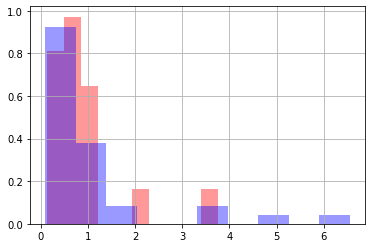

In [7]:
precon['RAIN.PRE'].hist(alpha=0.4,color='red',density="True")
durcon['RAIN.DUR'].hist(alpha=0.4,color='blue',density="True")

This will show that as "distributions" they look pretty similar, although the during construction data has a few larger events.

Now

- Is the total solids (TS) different before construction?

<AxesSubplot:>

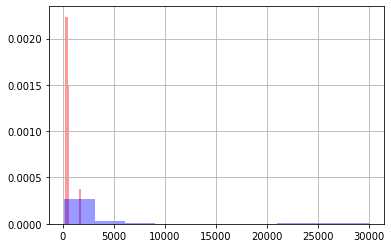

In [8]:
precon['TS.PRE'].hist(alpha=0.4,color='red',density="True")
durcon['TS.DUR'].hist(alpha=0.4,color='blue',density="True")

Here it is hard to tell, but the preconstruction values are all to the left while the during construction phase has some large values.  

Lets compare means and standard deviations

$ \mu TS_{pre} = 463 $<br>
$ \sigma TS_{pre} = 361 $<br>
$ \mu TS_{dur} = 3495 $<br>
$ \sigma TS_{dur} = 7104 $<br>

Certainly different, and the mean during construction is 8 pre-construction standard deviations larger, hence supportive of a claim that there is a difference, however the standard deviation of the during phase is huge, easily encompassing the preconstruction mean, so is there really a difference?  We could resort to simulation to try to answer the question.

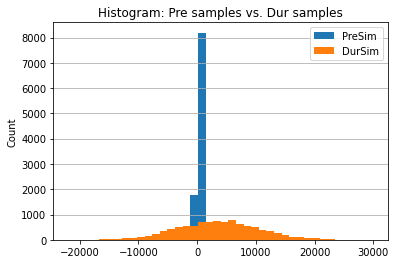

In [9]:
pre_s = np.random.normal(np.array(precon['TS.PRE']).mean(), np.array(precon['TS.PRE']).std(), 10000) # random sample from a normal distribution function
dur_s = np.random.normal(np.array(durcon['TS.DUR']).mean(), np.array(durcon['TS.DUR']).std(), 10000) # random sample from a normal distribution function
myfakedata_d = pd.DataFrame({'PreSim':pre_s,'DurSim':dur_s}) # make into a dataframe _d == derived
fig, ax = plt.subplots()
myfakedata_d.plot.hist(density=False, ax=ax, title='Histogram: Pre samples vs. Dur samples', bins=40)
ax.set_ylabel('Count')
ax.grid(axis='y')

Here we learn the standard deviations mean a lot, and the normal distribution is probably not the best model (negative solids don't make physical sense).  However it does point to the important issue, how to quantify the sameness or differences?  

Thats the goal of hypothesis testing methods.

In lab you will use similar explorations, and next time we will get into the actual methods.

## References

<hr>

## Laboratory 21

**Examine** (click) Laboratory 21 as a webpage at [Laboratory 21.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab21/Lab21.html)

**Download** (right-click, save target as ...) Laboratory 21 as a jupyterlab notebook from [Laboratory 21.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab21/Lab21.ipynb)


<hr><hr>

## Exercise Set 21

**Examine** (click) Exercise Set 21 as a webpage at [Exercise 21](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab21/Lab21-TH.html)

**Download** (right-click, save target as ...) Exercise Set 21 as a jupyterlab notebook at  [Exercise Set 21](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab21/Lab21-TH.ipynb)

